In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from plotting_preferences import plotting_preferences_AS

In [2]:
np.random.seed(123)
plotting_preferences_AS()

## Questions

![](./graphics/some_off_square.png)

A circle is randomly generated by sampling two points uniformly and independently from 
the interior of a square and using these points to determine its diameter. What is the 
probability that the circle has a part of it that is off the square? **Give your answer 
in exact terms.**

## Solution 1
- **Spoiler**: the final solution is wrong here, but the base intuition is right!
### Intuition
- To begin, I didn't think much about the shapes, but I imagined square as a set of points $x,\,y \in [a,\,b]$ where $a$ and $b$ are some real numbers.
    - I think this is a helpful framing for converting the problem into code + for generalizing the solution to n-dimensions (albeit not necessary here).
- The corners of the diameters are simply two points sampled from these two set of points.
- Finding the center of the circle is straightforward: it is simply the average of the two sampled points. 
- *(Here's where things went wrong)* For whatever reason, I thought that if the point on 
the circle which formed an isosceles triangle was inside the square, then the entire circle would be inside the square, so I chased this strain of thought, found the slope of the diameter "inverted" it, found where the line with that slope intersected with the circle, and then checked if those points were inside or outside the circle. 
- Another extra thing I did was varying the amounts of times I was sampling the points.
    - The idea here is simple as well: if the answer converges as the number of points 
    sampled increases, then the math is sound.
 

In [3]:
runs = [int(1 * 2 ** i) for i in range(1, 24)]
total_runs = int(1e5)
count = 0
value = []

for i in tqdm(range(total_runs)):
    x1, y1 = np.random.uniform(0, 1), np.random.uniform(0, 1)
    x2, y2 = np.random.uniform(0, 1), np.random.uniform(0, 1)
    
    x_c, y_c = 0.5 * (x1 + x2), 0.5 * (y1 + y2)
    
    radius = np.sqrt((x1 - x_c) ** 2 + (y1 - y_c) ** 2)
    slope = -1 * (x2 - x1) / (y2 - y1)
    
    #x_unknown_1 = np.sqrt(radius ** 2 - (y_unknown - y_c) ** 2) + x_c
    #y_unknown = y_c - slope * (x_c - x_unknown)
    
    x_unknown_1 = x_c + np.sqrt(radius ** 2 / (slope ** 2 + 1))
    x_unknown_2 = x_c - np.sqrt(radius ** 2 / (slope ** 2 + 1))
    
    y_unknown_1 = y_c - slope * (x_c - x_unknown_1)
    y_unknown_2 = y_c - slope * (x_c - x_unknown_2)
    
    conditions = (
            (0 < x_unknown_1 < 1 and 0 < y_unknown_1 < 1) and
            (0 < x_unknown_2 < 1 and 0 < y_unknown_2 < 1)
    )
    
    if not conditions:
        #print(x_unknown_1, y_unknown_1, x_unknown_2, y_unknown_2)
        count += 1
    value.append(count / total_runs)

print(count / total_runs)

100%|██████████| 100000/100000 [00:00<00:00, 175441.99it/s]

0.33193


## Solution 2
- This is the one I submitted.
- The improvement here is parallelization. Since the same operation is performed during
 each run, it is better to do

In [4]:
runs = [int(1 * 2 ** i) for i in range(6, 28)]
value = []

for total_runs in tqdm(runs):
    x1, y1 = np.random.uniform(0, 1, total_runs), np.random.uniform(0, 1, total_runs)
    x2, y2 = np.random.uniform(0, 1, total_runs), np.random.uniform(0, 1, total_runs)
    
    x_c, y_c = 0.5 * (x1 + x2), 0.5 * (y1 + y2)
    
    radius = np.sqrt((x1 - x_c) ** 2 + (y1 - y_c) ** 2)
    slope = -1 * (x2 - x1) / (y2 - y1)
    
    x_unknown_1 = x_c + np.sqrt(radius ** 2 / (slope ** 2 + 1))
    x_unknown_2 = x_c - np.sqrt(radius ** 2 / (slope ** 2 + 1))
    
    y_unknown_1 = y_c - slope * (x_c - x_unknown_1)
    y_unknown_2 = y_c - slope * (x_c - x_unknown_2)
    
    condition_1 = (np.logical_and(0 < x_unknown_1, x_unknown_1 < 1) 
                   & np.logical_and(0 < y_unknown_1, y_unknown_1 < 1))
    condition_2 = (np.logical_and(0 < x_unknown_2, x_unknown_2 < 1) 
                   & np.logical_and(0 < y_unknown_2, y_unknown_2 < 1))

    combined_conditions = condition_1 & condition_2
    
    count_false = np.sum(~combined_conditions) 
    
    value.append(count_false / total_runs)

100%|██████████| 22/22 [00:13<00:00,  1.61it/s] 


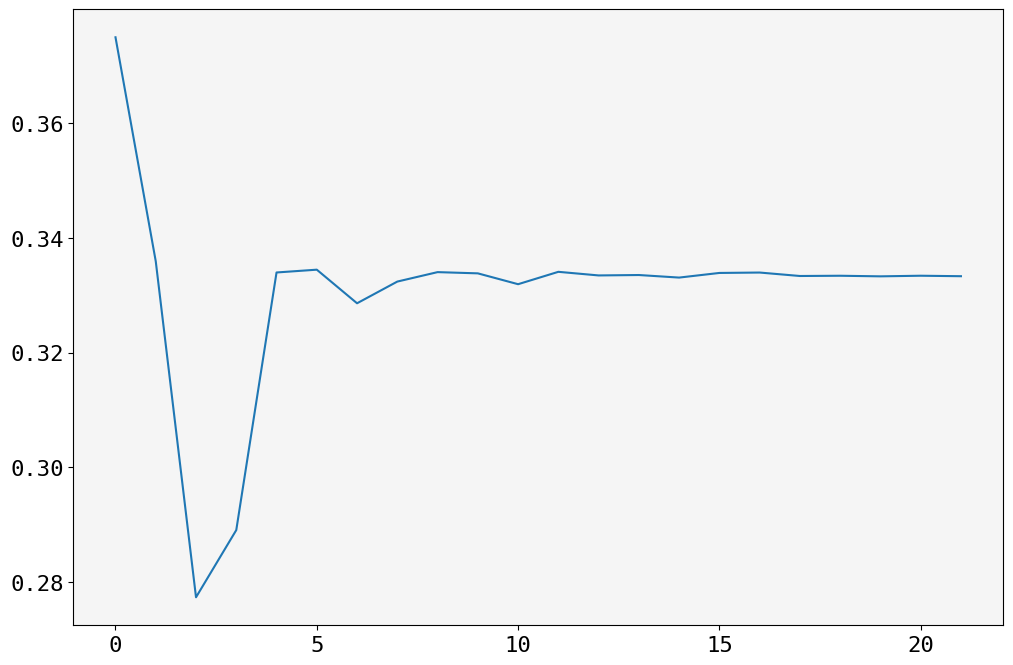

In [5]:
plt.plot(range(len(runs)), value)

In [ ]:
runs = [int(1 * 2 ** i) for i in range(6, 28)]
value = []

for total_runs in tqdm(runs):
    x1, y1 = np.random.uniform(0, 1, total_runs), np.random.uniform(0, 1, total_runs)
    x2, y2 = np.random.uniform(0, 1, total_runs), np.random.uniform(0, 1, total_runs)
    
    x_c, y_c = 0.5 * (x1 + x2), 0.5 * (y1 + y2)
    radius = np.sqrt((x1 - x_c) ** 2 + (y1 - y_c) ** 2)
    
    # Check if the circle is within the bounds of the square
    condition = (x_c - radius >= 0) & (x_c + radius <= 1) & \
                (y_c - radius >= 0) & (y_c + radius <= 1)
    
    count_false = np.sum(~condition) 
    value.append(count_false / total_runs)


In [6]:
plt.plot(range(len(runs)), value)

100%|██████████| 22/22 [00:08<00:00,  2.47it/s] 


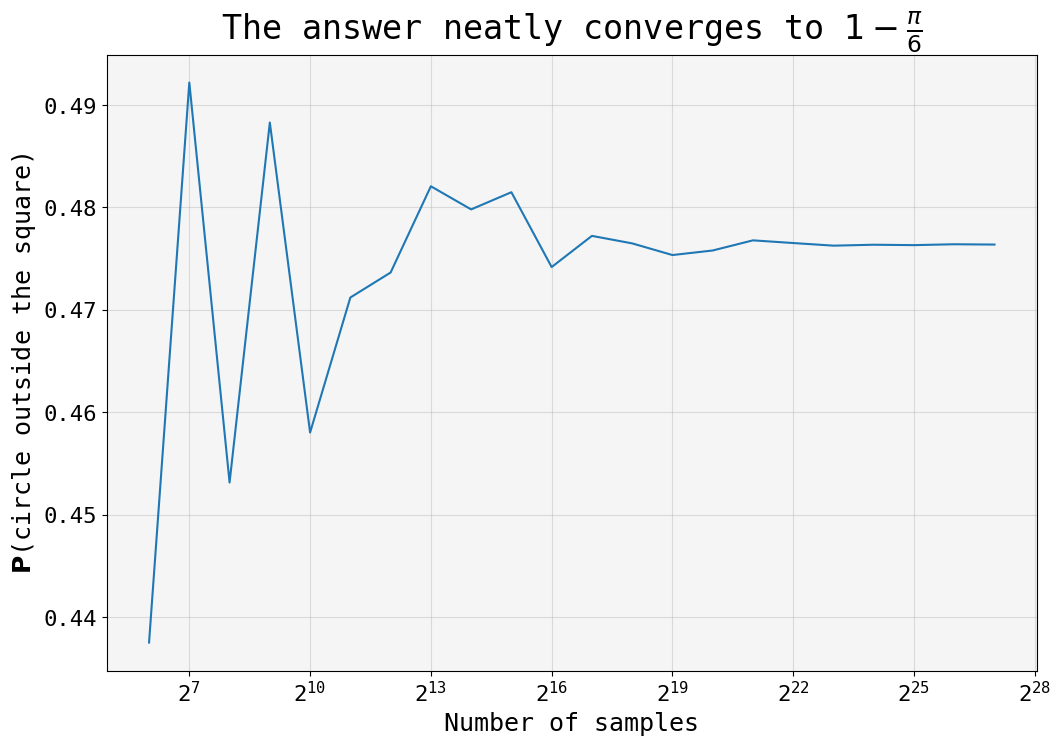

In [7]:
np.isclose(value[-1], 1- np.pi / 6, rtol=1e-2)

In [8]:
1 - np.pi / 6

True